# Atelier théorique #5 - **Visualisation des données**

## Objectifs de cette leçon
1. Créer un histogramme de distribution (histogram)
2. Créer des diagrammes de densité (density plot)
3. Créer des graphiques boîte à moustache (boxplot)
4. Créer une matrice de corrélation (heatmap)
5. Créer une matrice de nuage de données (scatterplot)

In [1]:
# Importer la librairie pandas
import pandas as pd

# Télécharger le jeu de données
data = pd.read_csv('diabetes.csv')

# Remplacer le nom des colonnes
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data.columns = colnames

## Importer les librairies de visualisation

In [2]:
# Importer les librairies de visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Définir le style des graphiques
sns.set_style("darkgrid")

# Ajout pour retirer les avertissements 
# N'affecte pas les codes et les visualisations
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## Retour sur la normalité et l'assymétrie des données

Tel que vu dans la leçon précédente, il est important de vérifier la normalité et l'assymétrie des données. En plus des descriptions statistiques, visualiser les distributions permet de faire des observations plus concrètes.

## 1. Histogramme de distribution

Les histogrammes de distribution permettent (comme le nom le dit) de visualiser la distribution des valeurs pour chacune des variables d'un jeu de données. 

### Comment ils fonctionnent?
Les histogrammes de distribution permettent de...
* Obtenir un décompte du nombre d'observations pour chaque barre (intervalle).
* Évaluer visuellement, pour chaque variable, si elle suit une distribution normale.
* Identifier des variables dont la distribution serait assymétrique. 

Il y a 2 façons de créer ces graphiques:
1. Créer une matrice de graphiques pour toutes les variables en même temps.
2. Créer un graphique simple pour une seule variable à la fois.

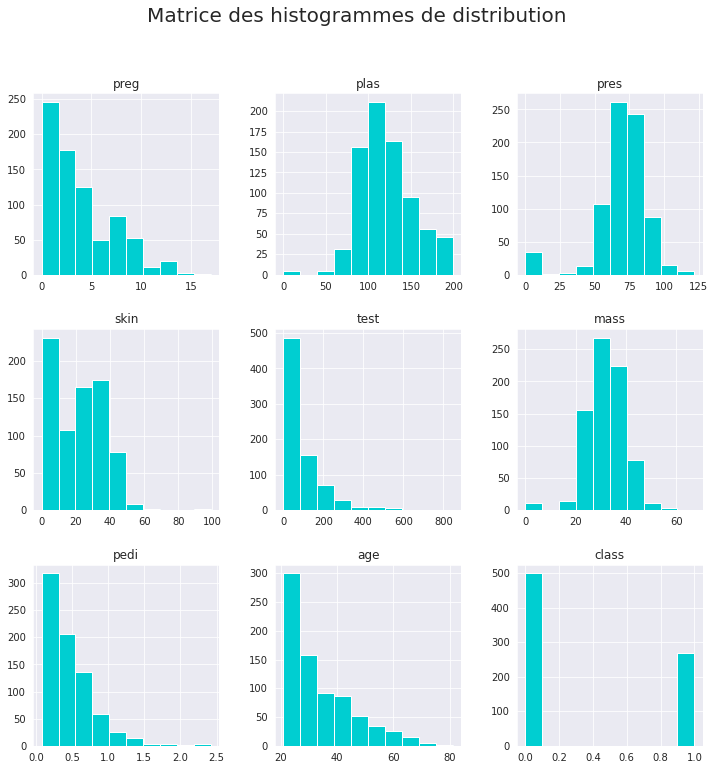

In [3]:
# Créer une matrice de graphiques pour toutes les variables en même temps
data.hist(bins=10, color="darkturquoise", figsize=(12,12))
plt.suptitle("Matrice des histogrammes de distribution", fontsize=20)
plt.show()

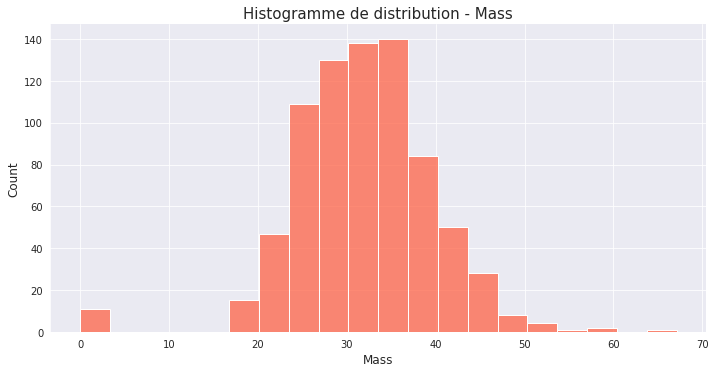

In [4]:
# Histogramme de distribution simple pour une seule variable
sns.displot(data["mass"], bins= 20, color ='tomato', height=5, aspect=2) 
plt.title("Histogramme de distribution - Mass", fontsize=15)
plt.xlabel("Mass", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

## 2. Graphique de densité

Pour complémenter l'histogramme de distribution, il est utile d'utiliser le graphique de densité. 

Il permet de visualiser de façon plus instinctive la forme des courbes de distribution pour chaque variable.

Il y a 2 façons de créer ces graphiques:
1. Créer une matrice de graphiques pour toutes les variables en même temps.
2. Créer un graphique simple pour une seule variable à la fois où la courbe de densité est superposée à l'histogramme à barre.

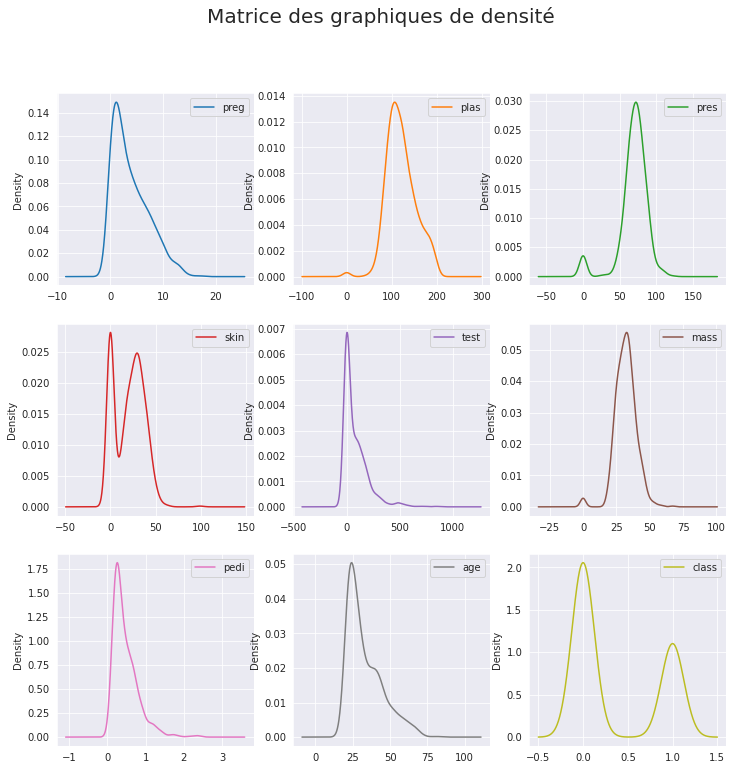

In [5]:
# Créer une matrice de graphiques pour toutes les variables en même temps
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(12,12))
plt.suptitle("Matrice des graphiques de densité", fontsize=20)
plt.show()

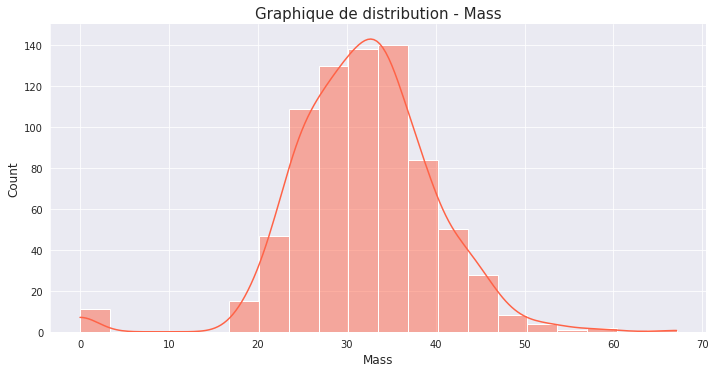

In [6]:
# Histogramme de distribution simple pour une seule variable
sns.displot(data["mass"], bins= 20, color ='tomato', kde=True, height=5, aspect=2) 
plt.title("Graphique de distribution - Mass", fontsize=15)
plt.xlabel("Mass", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

## 3. Diagramme boîte à moustache (boxplot)

Ce type de visualisation permet d'appronfondir ce qu'on a obtenu avec la fonction `describe()` de pandas dans la leçon précédente. 

Il y a plusieurs informations importantes dans ces graphiques :
* La ligne centrale (verte) est la médiane.
* Les extrémités hautes et basses de la boite correspondent aux 25e et 75e percentile, en d'autres mots où se situent 50% des valeurs pour chaque variable.
* Les "pattes" de la boîte donnent un aperçu de l'étendu des valeurs.
* Les points individuels permettent d'identifier des valeurs extrêmes (*outliers*)



In [7]:
# Retour sur la fonction describe
data.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


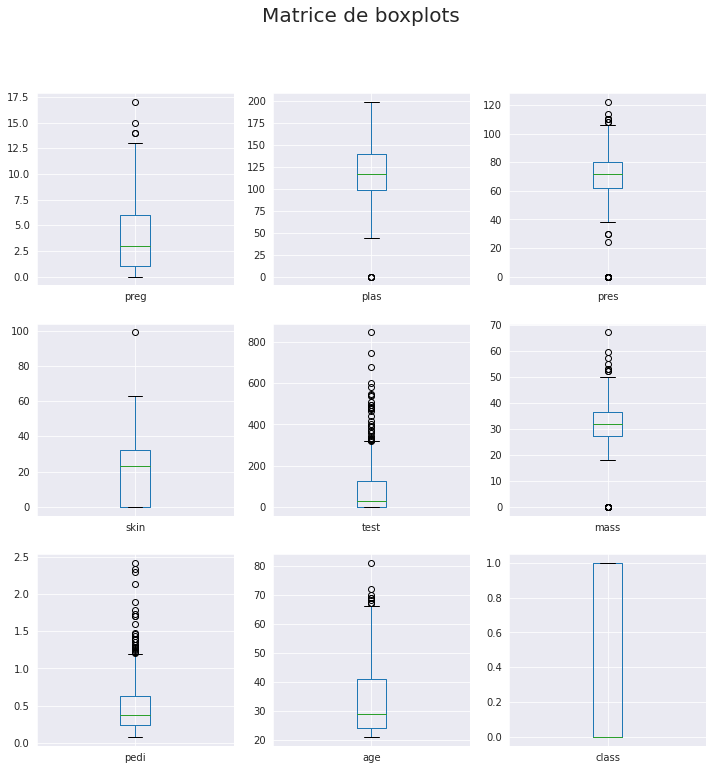

In [8]:
# Matrice de boxplots
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, figsize=(12,12))
plt.suptitle("Matrice de boxplots", fontsize=20)
plt.show()

## 4. Diagramme à barre (barplot)
Les diagrammes à barre peuvent être utilisés pour faire des visualisation comparatives. Ils permettent de résumer de l'information facilement interprétable à l'oeil nu.

Dans l'exemple ci-dessous, on reprend la comparaison entre les classes à prédire pour la variable cible `class`.

On peut ainsi évaluer rapidement si le jeu de données est balancé ou non.

In [9]:
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# Évaluer si le jeu de données est balancé
data.groupby('class').size()

class
0    500
1    268
dtype: int64

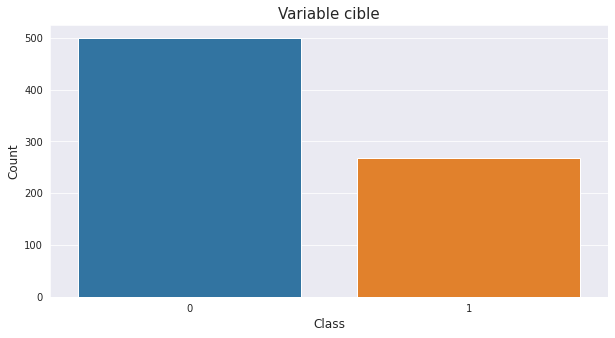

In [11]:
# Diagramme à barre (barplot)
plt.figure(figsize=(10,5))
sns.countplot(data=data, x="class")
plt.title(label="Variable cible", fontsize=15)
plt.xlabel(xlabel="Class", fontsize=12)
plt.ylabel(ylabel="Count", fontsize=12)
plt.show()

### Graphique bonus
Il est possible de pousser plus loin encore dans les visualisations et d'intégrer les classes de la variable cible dans les graphiques de distribution qu'on a fait plus haut.

Il y a évidemment beaucoup d'information dans un seul graphique, mais il peut parfois être pertinent d'amalgamer les graphiques tout en un pour acquérir encore plus d'intuition sur les données.

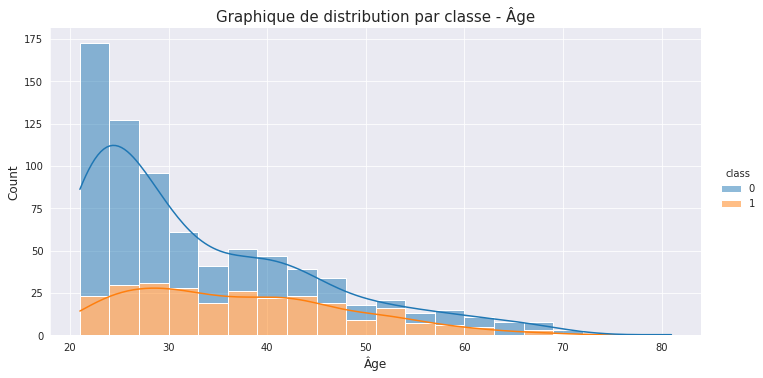

In [12]:
# Diagrammes de distribution et de densité séparé pour chaque classe de la variable cible
sns.displot(data=data, x="age", bins= 20, hue="class", multiple="stack", kde=True, height=5, aspect=2)
plt.title("Graphique de distribution par classe - Âge", fontsize=15)
plt.xlabel("Âge", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

## 5. Matrice de corrélation

Dans la leçon 4, on a produit une matrice de corrélation en chiffre pour identifier les variables qui étaient fortement corrélées entres elles.

Une option alternative et visuelle pour obtenir les mêmes résultats est de produire une matrice sous forme de graphique.

**3 observations à faire sur la matrice de corrélation graphique :**
1. La diagonale centrale représente une corrélation parfaite puisqu'on y oppose la même variable.
2. Les 2 sections séparées par la diagonale centrale donnent la même information en double. 
3. La languette à droite du graphique représente le gradient de couleur utilisé pour catégoriser la force et la direction d'une corrélation entre deux variables.

> **Note** : Pour produire le graphique de corrélation, il faut d'abord extraire les corrélations sous forme de tableau, tel qu'effectué dans la leçon précédente.

In [13]:
# Produire le tableau des corrélations
correlations = data.corr()
correlations

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


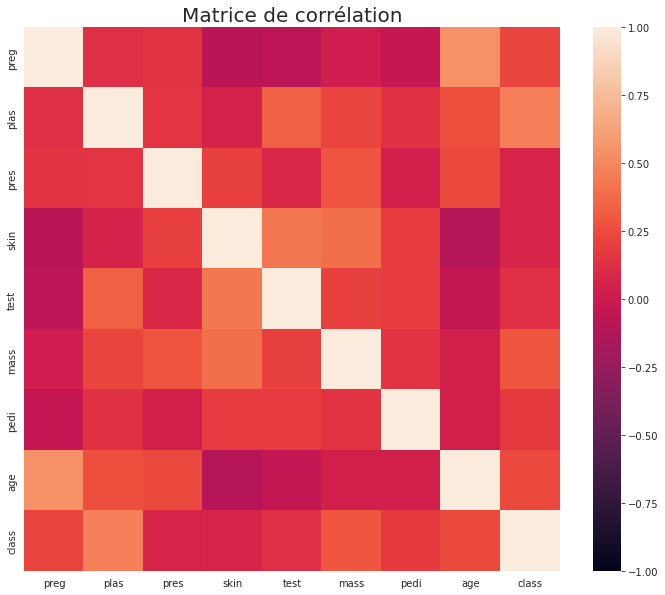

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(data=correlations, vmin=-1, vmax=1)
plt.title(label="Matrice de corrélation", fontsize=20)
plt.show()

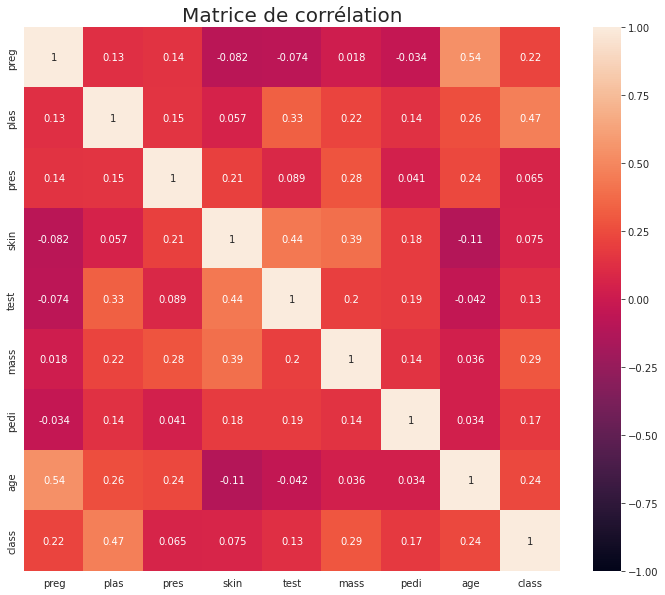

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(data=correlations, annot=True, vmin=-1, vmax=1)
plt.title(label="Matrice de corrélation", fontsize=20)
plt.show()

## 6. Matrice de nuages de points

La matrice de nuages de points permet de visualiser la relation entre deux variables sur un plan en 2 dimensions.

C'est le graphique ultime pour mettre en perspective toutes les autres visualisations effectuées dans les étapes précédentes. 

**3 observations à faire sur la matrice de nuages de points :** 
1. Chaque variable occupe une ligne et une colonne de chaque axe.
2. La diagonale centrale représente la distribution des valeurs pour une seule variable.
3. Les 2 sections séparées par la diagonale centrale donnent la même information en double.



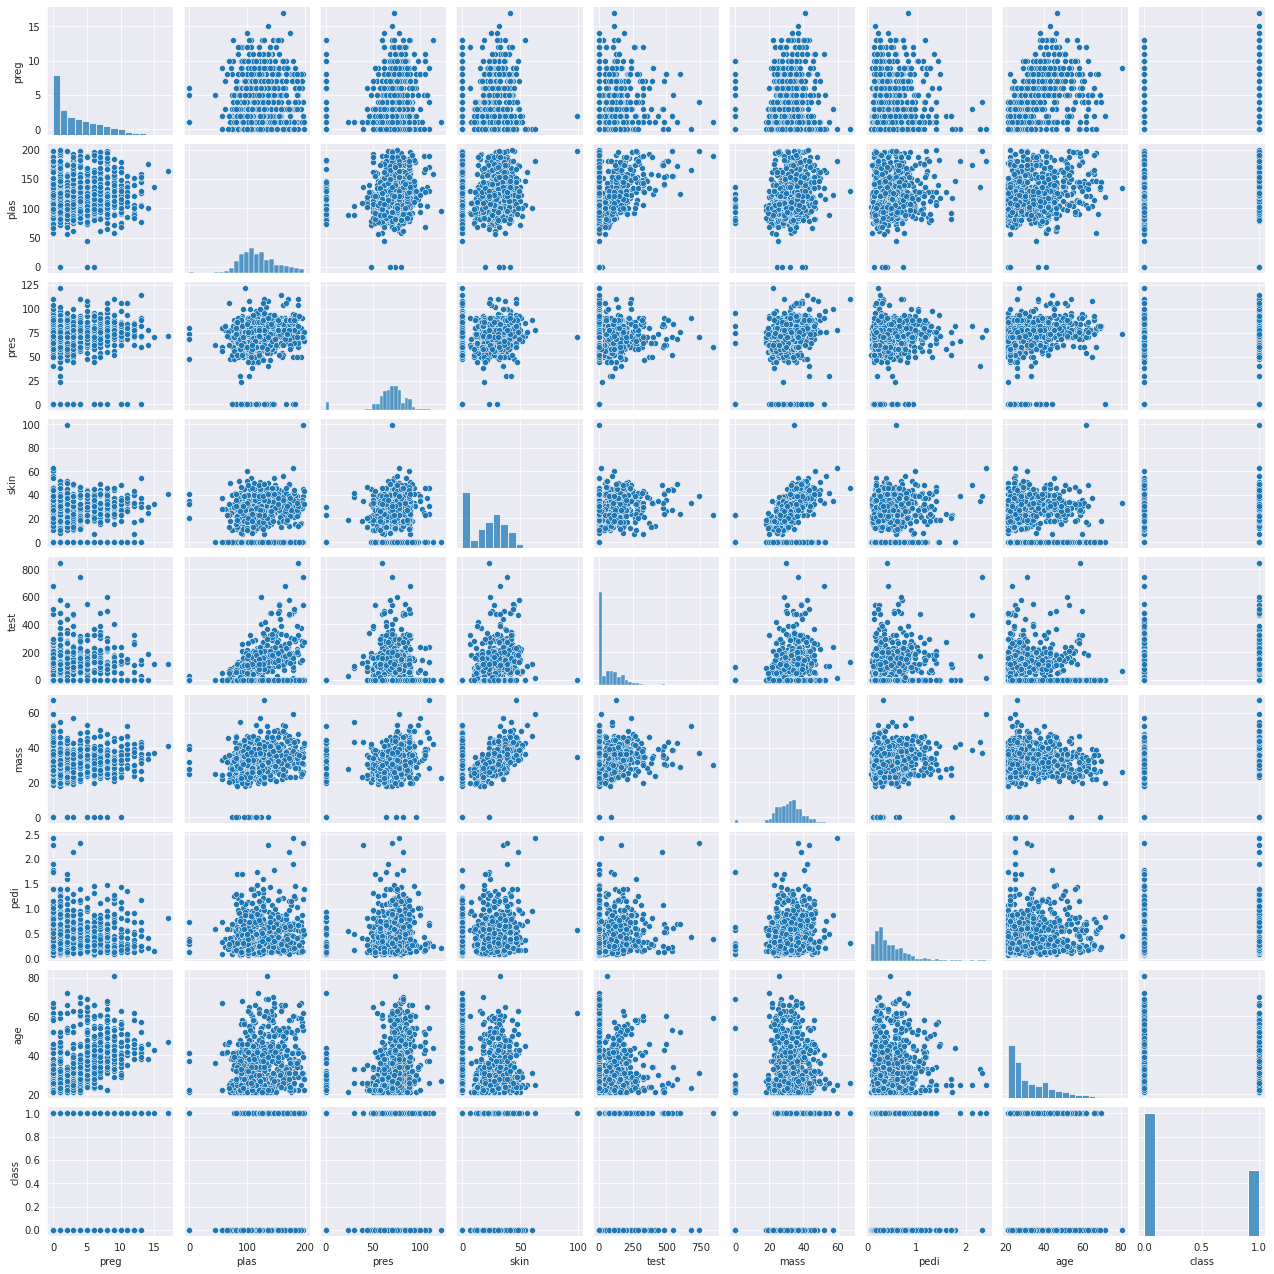

In [16]:
sns.pairplot(data=data, height=2)

Il est aussi possible d'inclure encore plus d'information dans cette matrice de nuages de points. 

On peut considérer la classe de la variable cible avec l'argument `hue` pour obtenir une image plus complète et raffinée des relations entre les différentes variables.

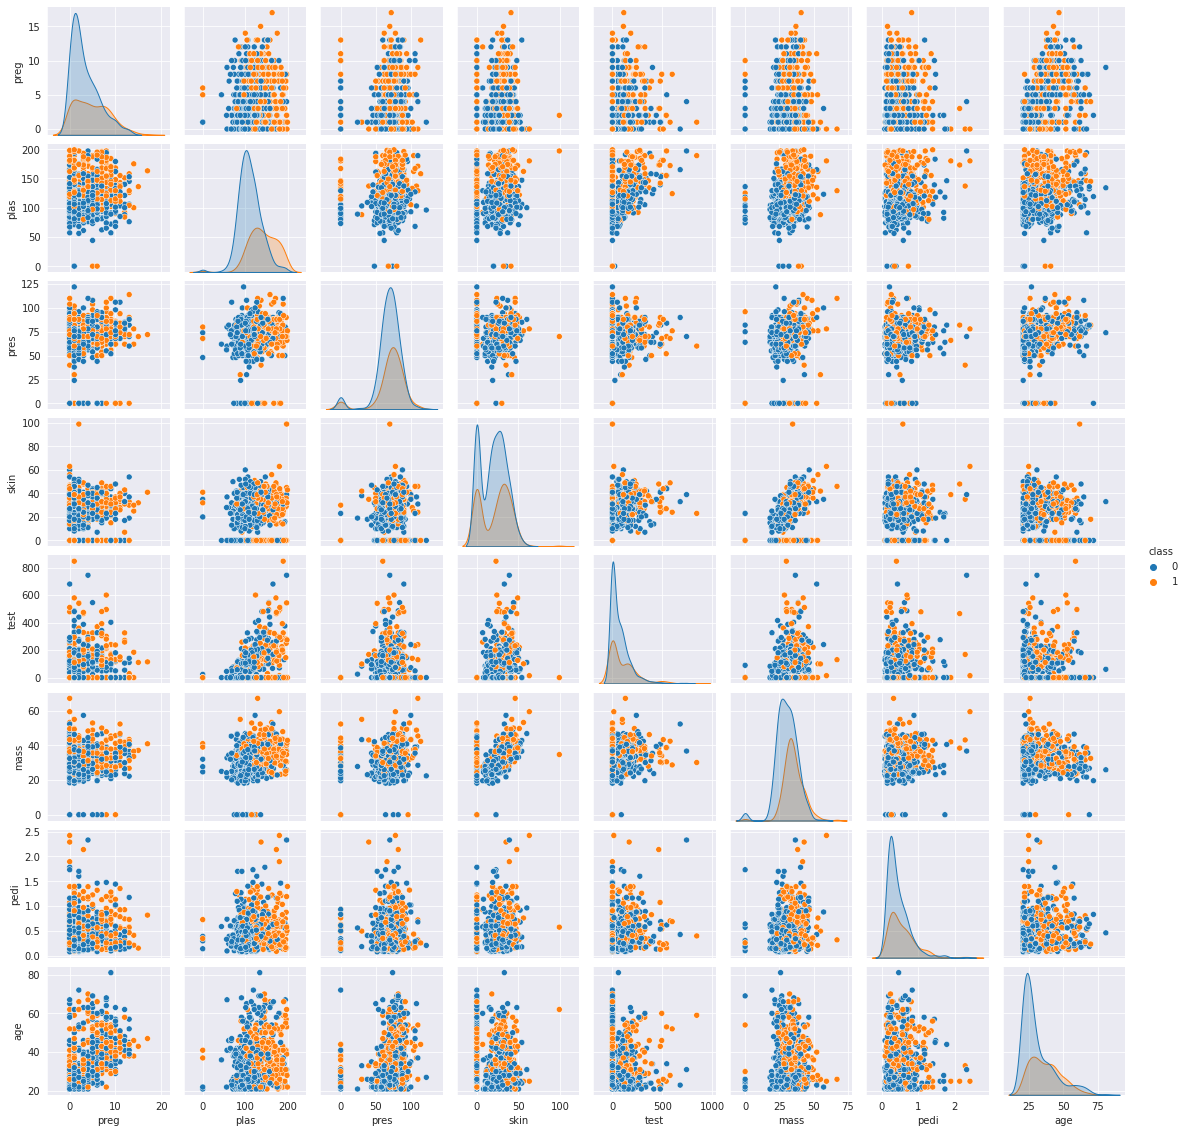

In [ ]:
sns.pairplot(data=data, hue="class", height=2)

## **LEÇON #5 - EXERCICE CONTINU**

> *Utiliser votre notebook individuel `notebook_pratique_classification_binaire.ipynb`*

### Description
En utilisant le notebook pratique que vous avez commencer à utiliser durant la dernière leçon, accomplir les tâches énumérées ci-dessous.

> **Répondre aux questions dans une cellule de texte Markdown au fur et à mesure que vous progressez.**

> **Refaites rouler le code en entier avant de commencer cet exercice.** Utiliser le menu Exécution/Tout exécuter pour y parvenir.

## Tâches à accomplir :
1. Créer la matrice des **histogrammes de distribution** pour chaque variable du jeu de données.
  * **Questions 1.1** : Changer la couleur des barres de l'histogramme.
  * Indice : https://matplotlib.org/stable/gallery/color/named_colors.html 
  * **Question 1.2** : Changer le nombre de barres utilisé dans les graphiques pour une valeur de 20 barres. Remarquez-vous une différence?
2. Créer la matrice des **graphiques de densité** pour chaque variable du jeu de données.
  * **Questions 2.1** : Visuellement, pouvez-vous identifier la direction de l'assymétrie pour chacune des variables `variance`, `skewness`, `entropy` et `curtosis`?
3. Créer la matrice des **graphiques boîte à moustache** pour chaque variable du jeu de données.
 * **Question 3.1** : Quelles statistiques descriptives est complémentaire aux graphiques à moustache? Dans une cellule code, imprimer ces statistiques en utilisant la fonction appropriée.
 * **Questions 3.2** : Y a-t-il une variable qui possède une valeur extrême? Si oui, nommez-la.
4. Comparer les classes de la variable cible avec un **diagramme à barre**.
5. Produire la matrice de corrélation entre les variables avec la valeur de corrélations inscrites dans chaque case.
  * **Question 5.1** : Pouvez-vous changer la couleur du gradient utilisé dans la matrice de corrélation?
  * Indice : https://matplotlib.org/stable/tutorials/colors/colormaps.html 
  * **Question 5.2** : Quelle couleur est associée avec une corrélation négative forte?
  * **Questions 5.3** : Quelle couleur est associée avec une corrélation positive forte?
6. Produire la matrice des nuages de points.

**Bonus**

Indice : https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot

7. En utilisant la librairie seaborn, créer les visualisations suivantes:
  * 7.1. Graphique nuage de points mettant en relation les variables `curtosis`et `skewness`.
  * 7.2. Graphique nuage de points mettant en relation les variables `variance` et `entropy`. Ajouter également la variable cible `class` comme valeur discriminante dans le graphique.